## Stress Detection - NLP

In today's fast-paced world, stress has become a major problem affecting individuals' psychological and physical health. Stress has negative effects on many areas, from work performance to overall quality of life. Therefore, early detection and management of stress is critical to improving individuals' quality of life. In addition to traditional methods, natural language processing (NLP) technologies offer an innovative approach to detecting stress.

NLP is a discipline that brings together the fields of computer science and linguistics to understand, analyze, and interpret people's natural language. Methods such as text analysis, sentiment analysis, and machine learning can be used to understand individuals' emotional states. Social media platforms such as Reddit and Twitter offer rich data sources where users express their emotions. This data provides an important opportunity to determine and analyze stress levels.

This project aims to use NLP techniques to detect and analyze individuals' stress levels. Data obtained from users' written expressions will be combined with sentiment analysis and various text features to gain insights into stress states. In this way, it will be possible to develop strategies that will help individuals cope with stress.

<img src='stres.jpg' width=550 >

### Import Libraries

In [1]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
df=pd.read_csv('stress.csv')
#Read the file.

### EDA - Exploratory Data Analysis

In [3]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,lex_liwc_Sixltr,lex_liwc_Dic,lex_liwc_function,lex_liwc_pronoun,lex_liwc_ppron,lex_liwc_i,lex_liwc_we,lex_liwc_you,lex_liwc_shehe,lex_liwc_they,lex_liwc_ipron,lex_liwc_article,lex_liwc_prep,lex_liwc_auxverb,lex_liwc_adverb,lex_liwc_conj,lex_liwc_negate,lex_liwc_verb,lex_liwc_adj,lex_liwc_compare,lex_liwc_interrog,lex_liwc_number,lex_liwc_quant,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo,lex_liwc_anx,lex_liwc_anger,lex_liwc_sad,lex_liwc_social,lex_liwc_family,lex_liwc_friend,lex_liwc_female,lex_liwc_male,lex_liwc_cogproc,lex_liwc_insight,lex_liwc_cause,lex_liwc_discrep,lex_liwc_tentat,lex_liwc_certain,lex_liwc_differ,lex_liwc_percept,lex_liwc_see,lex_liwc_hear,lex_liwc_feel,lex_liwc_bio,lex_liwc_body,lex_liwc_health,lex_liwc_sexual,lex_liwc_ingest,lex_liwc_drives,lex_liwc_affiliation,lex_liwc_achieve,lex_liwc_power,lex_liwc_reward,lex_liwc_risk,lex_liwc_focuspast,lex_liwc_focuspresent,lex_liwc_focusfuture,lex_liwc_relativ,lex_liwc_motion,lex_liwc_space,lex_liwc_time,lex_liwc_work,lex_liwc_leisure,lex_liwc_home,lex_liwc_money,lex_liwc_relig,lex_liwc_death,lex_liwc_informal,lex_liwc_swear,lex_liwc_netspeak,lex_liwc_assent,lex_liwc_nonflu,lex_liwc_filler,lex_liwc_AllPunc,lex_liwc_Period,lex_liwc_Comma,lex_liwc_Colon,lex_liwc_SemiC,lex_liwc_QMark,lex_liwc_Exclam,lex_liwc_Dash,lex_liwc_Quote,lex_liwc_Apostro,lex_liwc_Parenth,lex_liwc_OtherP,lex_dal_max_pleasantness,lex_dal_max_activation,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,116,72.64,15.04,89.26,1.00,29.00,12.93,87.07,56.03,16.38,12.07,9.48,0.00,0.86,1.72,0.0,4.31,3.45,19.83,7.76,5.17,4.31,1.72,16.38,6.03,3.45,0.86,1.72,1.72,8.62,1.72,6.90,0.86,2.59,3.45,3.45,0.00,0.00,0.00,1.72,11.21,3.45,0.86,2.59,5.17,0.00,2.59,6.03,1.72,1.72,1.72,2.59,0.86,1.72,0.00,0.00,8.62,0.00,1.72,4.31,0.86,2.59,4.31,11.21,0.86,17.24,0.86,10.34,6.03,0.86,0.00,0.00,0.00,2.59,0.0,0.86,0.86,0.00,0.00,0.0,0.0,21.55,9.48,3.45,0.86,0.86,0.0,0.0,0.0,5.17,1.72,0.00,0.00,2.8571,2.6250,3.0,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,109,79.08,76.85,56.75,98.18,27.25,21.10,87.16,48.62,11.93,7.34,1.83,2.75,2.75,0.00,0.0,4.59,8.26,13.76,6.42,3.67,8.26,0.92,15.60,2.75,0.92,0.92,2.75,0.92,5.50,5.50,0.00,0.00,0.00,0.00,11.01,0.00,0.00,0.00,0.00,11.93,1.83,0.00,3.67,5.50,1.83,6.42,0.92,0.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.60,5.50,3.67,7.34,2.75,0.00,0.92,13.76,0.92,15.60,2.75,10.09,1.83,11.01,0.00,0.00,0.92,0.00,0.0,1.83,0.00,0.92,0.00,0.0,0.0,14.68,4.59,2.75,0.00,0.00,0.0,0.0,0.0,0.00,2.75,0.92,3.67,3.0000,2.8889,3.0,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,167,33.80,76.38,86.24,25.77,33.40,17.37,91.02,61.68,25.15,16.17,8.98,1.80,1.80,2.99,0.6,8.98,5.39,12.57,10.18,1.80,5.99,1.20,20.96,1.20,0.60,0.60,1.20,1.80,2.40,1.20,1.20,0.00,0.00,0.00,15.57,0.60,3.59,1.80,2.40,10.18,4.19,1.20,0.60,2.99,0.00,1.80,0.00,0.00,0.00,0.00,0.60,0.60,0.00,0.00,0.00,8.98,5.39,0.60,1.20,2.40,0.00,3.59,14.37,1.80,16.17,4.79,5.99,5.39,0.00,1.20,0.60,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,10.78,2.40,3.59,0.00,0.00,0.6,0.0,0.0,2.40,1.80,0.00,0.00,2.7143,3.0000,3.0,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,273,2.98,15.25,95.42,79.26,54.60,8.06,98.90,65.57,

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [5]:
df.shape

(2838, 116)

In [6]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
label                       0
confidence                  0
social_timestamp            0
social_karma                0
syntax_ari                  0
lex_liwc_WC                 0
lex_liwc_Analytic           0
lex_liwc_Clout              0
lex_liwc_Authentic          0
lex_liwc_Tone               0
lex_liwc_WPS                0
lex_liwc_Sixltr             0
lex_liwc_Dic                0
lex_liwc_function           0
lex_liwc_pronoun            0
lex_liwc_ppron              0
lex_liwc_i                  0
lex_liwc_we                 0
lex_liwc_you                0
lex_liwc_shehe              0
lex_liwc_they               0
lex_liwc_ipron              0
lex_liwc_article            0
lex_liwc_prep               0
lex_liwc_auxverb            0
lex_liwc_adverb             0
lex_liwc_conj               0
lex_liwc_negate             0
lex_liwc_v

In [7]:
df=df[['text','label','confidence','sentiment','lex_liwc_affect','lex_liwc_posemo','lex_liwc_negemo']]
#We get the required columns

#### Information about columns
* Text: Text data. Content where users express their stress. A basic resource for NLP analysis.

* Label: Indicates the emotional state of the text. Usually contains categories such as "No Stress" or "Stress". It is the target variable that the model needs to learn.

* Confidence: Indicates the confidence level of the model's prediction. For example, the confidence rate that the model has in thinking that a text is stressful.

* Sentiment: Indicates the general emotional state of the text. Usually divided into categories such as positive, negative or neutral. Important for sentiment analysis.

* Lex_liwc_affect: Indicates the total number of emotional words. Measures the intensity of emotional content in the text.

* Lex_liwc_posemo: Indicates the number of positive emotional words. Determines whether the text has a positive emotional tone.

* Lex_liwc_negemo: Indicates the number of negative emotional words. Determines whether the text has a negative emotional tone.

In [8]:
#df=df[['text','label']]
#Even if we work with only these two columns, our success rate is still the same. 
#The success rate is not higher only in the automl packages.

In [9]:
df.head()

,text,label,confidence,sentiment,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo
0,"He said he had not felt that way before, sugge...",1,0.8,-0.002742,8.62,1.72,6.90
1,"Hey there r/assistance, Not sure if this is th...",0,1.0,0.292857,5.50,5.50,0.00
2,My mom then hit me with the newspaper and it s...,1,0.8,0.011894,2.40,1.20,1.20
3,"until i met my new boyfriend, he is amazing, h...",1,0.6,0.141671,8.79,5.86,2.93
4,October is Domestic Violence Awareness Month a...,1,0.8,-0.204167,7.87,0.00,7.87


In [10]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace("[^\w\s]" , "",regex=True)
df['text']=df['text'].str.replace('[\n]', '',regex=True)
df['text']=df['text'].str.replace('\d+','',regex=True)
df['text']=df['text'].str.replace('\r',' ')

In [11]:
df['label'].value_counts()

label
1    1488
0    1350
Name: count, dtype: int64

In [12]:
df['label']=df['label'].map({1:'Stress', 0:'No Stress'})

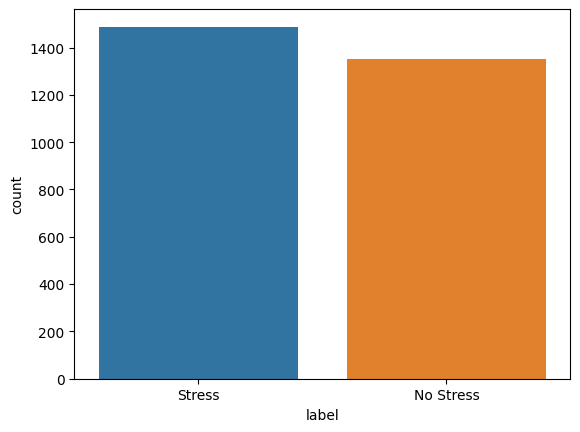

In [13]:
sns.countplot(x=df['label']);

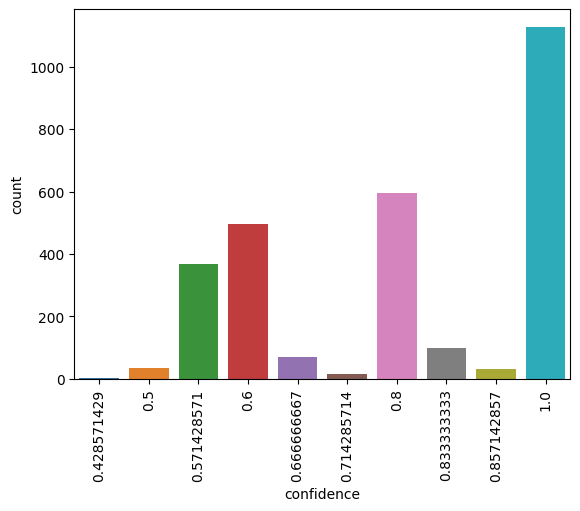

In [15]:
sns.countplot(x=df['confidence'])
plt.xticks(rotation=90);

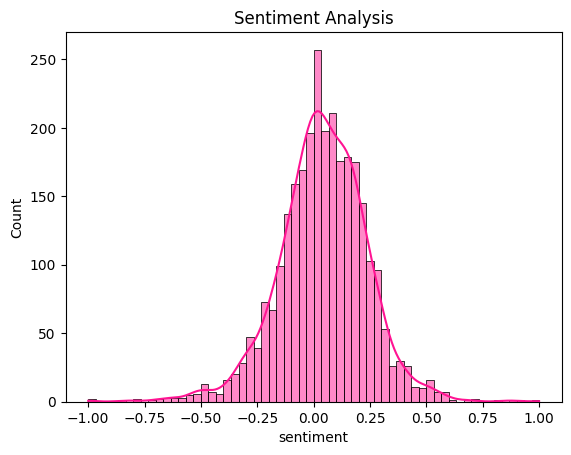

In [30]:
sns.histplot(x=df['sentiment'], kde=True, color='#FF1493')
plt.title('Sentiment Analysis');

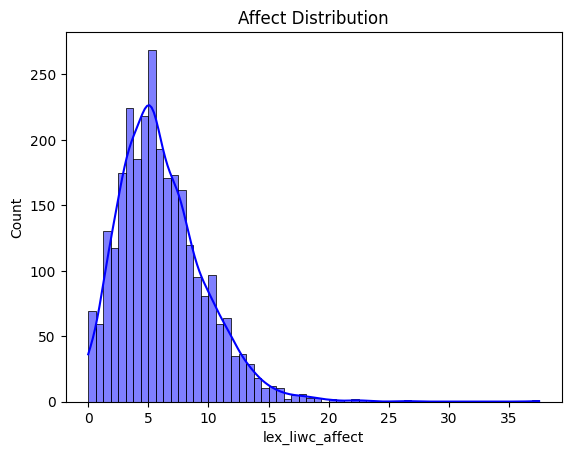

In [29]:
sns.histplot(x=df['lex_liwc_affect'], kde=True, color='blue')
plt.title('Affect Distribution');

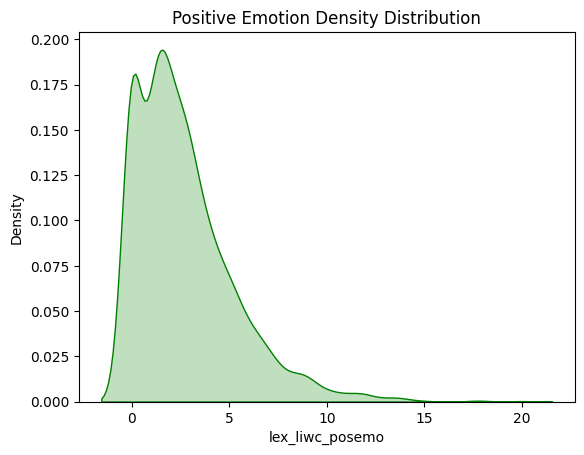

In [27]:
sns.kdeplot(x=df['lex_liwc_posemo'], fill=True, color='green')
plt.title('Positive Emotion Density Distribution');

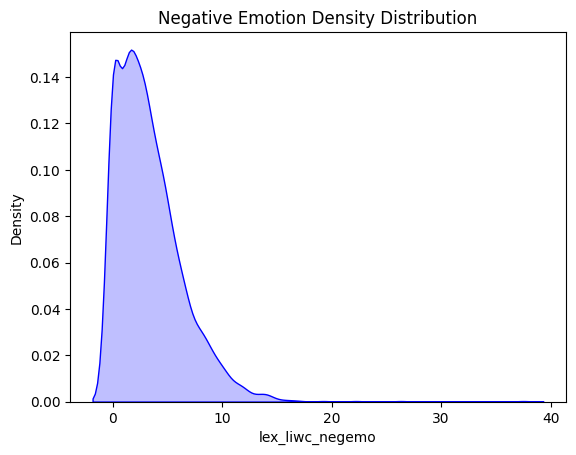

In [28]:
sns.kdeplot(x=df['lex_liwc_negemo'], fill=True, color='blue')
plt.title('Negative Emotion Density Distribution');

In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Separating Non-English Languages

In [32]:
#pip install langdetect

In [33]:
from langdetect import detect

In [34]:
df['lang']=df['text'].apply(lambda x: detect(x))

In [35]:
df['lang'].value_counts()

lang
en    2834
tl       4
Name: count, dtype: int64

In [36]:
df = df[df['lang'] == 'en']
#We remove non-English comments.

In [37]:
df['lang'].unique()

array(['en'], dtype=object)

In [38]:
df.head()

,text,label,confidence,sentiment,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo,lang
0,he said he had not felt that way before sugget...,Stress,0.8,-0.002742,8.62,1.72,6.90,en
1,hey there rassistance not sure if this is the ...,No Stress,1.0,0.292857,5.50,5.50,0.00,en
2,my mom then hit me with the newspaper and it s...,Stress,0.8,0.011894,2.40,1.20,1.20,en
3,until i met my new boyfriend he is amazing he ...,Stress,0.6,0.141671,8.79,5.86,2.93,en
4,october is domestic violence awareness month a...,Stress,0.8,-0.204167,7.87,0.00,7.87,en


### WordCloud

In [39]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def wc(data,bgcolor):
    plt.figure(figsize=(8,8))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

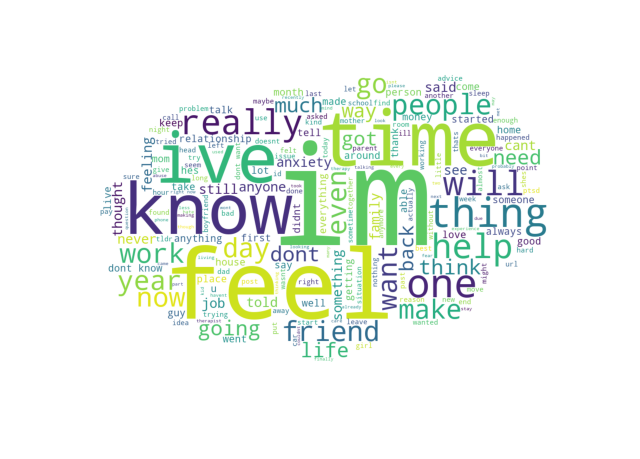

In [41]:
wc(df['text'],'white')
#Most used words by the people sharing about their life problems on social media

### Polarity-Subjectivity

In [42]:
from textblob import TextBlob

In [43]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity']= df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [44]:
df.head()

,text,label,confidence,sentiment,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo,lang,polarity,subjectivity
0,he said he had not felt that way before sugget...,Stress,0.8,-0.002742,8.62,1.72,6.90,en,-0.002742,0.426613
1,hey there rassistance not sure if this is the ...,No Stress,1.0,0.292857,5.50,5.50,0.00,en,0.266964,0.521825
2,my mom then hit me with the newspaper and it s...,Stress,0.8,0.011894,2.40,1.20,1.20,en,0.011894,0.594924
3,until i met my new boyfriend he is amazing he ...,Stress,0.6,0.141671,8.79,5.86,2.93,en,0.141671,0.555249
4,october is domestic violence awareness month a...,Stress,0.8,-0.204167,7.87,0.00,7.87,en,-0.204167,0.441667


### Removing Stop Words and Vectorizing

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem import PorterStemmer

In [46]:
pr=PorterStemmer()

In [47]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [48]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

### Modelling

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
x=df.drop('label', axis=1)
y=df[['label']]

In [51]:
x=vect.fit_transform(x['text'])

In [52]:
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=42,test_size=.20)

In [53]:
l=LogisticRegression()
model=l.fit(x_train,y_train)

In [54]:
lpred=l.predict(x_test)
accuracy_score(lpred,y_test)

0.708994708994709

In [55]:
print(classification_report(lpred, y_test))

              precision    recall  f1-score   support

   No Stress       0.69      0.72      0.70       274
      Stress       0.73      0.70      0.71       293

    accuracy                           0.71       567
   macro avg       0.71      0.71      0.71       567
weighted avg       0.71      0.71      0.71       567



In [56]:
confusion_matrix(lpred, y_test)

array([[197,  77],
       [ 88, 205]], dtype=int64)

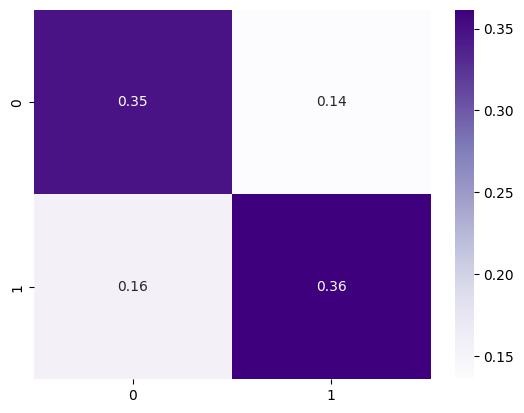

In [57]:
cm = confusion_matrix(lpred, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Purples');

In [58]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test(x, y):
    
    lr = LogisticRegression(max_iter=1000)
    b = BernoulliNB()
    nb = MultinomialNB()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()
    svc = SVC()
    mlp = MLPClassifier(max_iter=1000)

    algos = [lr,b, nb, knn, dt, rf, abc, gbc, svc, mlp]
    algo_names = ['Logistic Regression','BernoulliNB', 'MultinomialNB', 'K-Nearest Neighbors',
                  'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVM', 'MLP Classifier']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=algo_names)
    
    for algo in algos:
        algo.fit(x_train, y_train)
        y_pred = algo.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='weighted'))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))
        
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1-score'] = f1
    
    
    rtable = result.sort_values('Accuracy', ascending=False)
    return rtable


In [59]:
algo_test(x,y)

,Accuracy,Precision,Recall,F1-score
BernoulliNB,0.767196,0.777477,0.767196,0.765185
MultinomialNB,0.753086,0.770840,0.753086,0.749213
Random Forest,0.724868,0.740722,0.724868,0.720552
Gradient Boosting,0.721340,0.722551,0.721340,0.721045
MLP Classifier,0.710758,0.712409,0.710758,0.710304
Logistic Regression,0.708995,0.709370,0.708995,0.708915
SVM,0.707231,0.711657,0.707231,0.705877
AdaBoost,0.700176,0.700482,0.700176,0.700111
K-Nearest Neighbors,0.643739,0.645566,0.643739,0.642839
Decision Tree,0.610229,0.610227,0.610229,0.610181


### AutoML with Pycaret

In [60]:
x=df.drop('label', axis=1)
y=df[['label']]

In [61]:
from pycaret.classification import*

In [62]:
a=setup(data=df,target="label")

,Description,Value
0,Session id,1019
1,Target,label
2,Target type,Binary
3,Target mapping,"No Stress: 0, Stress: 1"
4,Original data shape,"(2834, 10)"
5,Transformed data shape,"(2834, 10)"
6,Transformed train set shape,"(1983, 10)"
7,Transformed test set shape,"(851, 10)"
8,Numeric features,7
9,Categorical features,2


In [63]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6974,0.7697,0.6974,0.6979,0.6963,0.3914,0.3929,0.5500
ridge,Ridge Classifier,0.6505,0.7677,0.6505,0.7052,0.6169,0.2803,0.3384,0.0290
knn,K Neighbors Classifier,0.6474,0.7006,0.6474,0.6481,0.6463,0.2923,0.2934,0.7640
xgboost,Extreme Gradient Boosting,0.6228,0.6821,0.6228,0.6063,0.5825,0.2466,0.2568,0.2120
svm,SVM - Linear Kernel,0.5633,0.6445,0.5633,0.6002,0.5066,0.1393,0.1750,0.0290
et,Extra Trees Classifier,0.5315,0.5339,0.5315,0.5728,0.4455,0.0280,0.0555,0.0700
rf,Random Forest Classifier,0.5280,0.7163,0.5280,0.6092,0.3695,0.0079,0.0486,0.0840
gbc,Gradient Boosting Classifier,0.5280,0.5042,0.5280,0.6092,0.3695,0.0079,0.0486,0.0730
lda,Linear Discriminant Analysis,0.5280,0.4306,0.5280,0.6092,0.3695,0.0079,0.0486,0.0330
lightgbm,Light Gradient Boosting Machine,0.5280,0.6572,0.5280,0.6092,0.3695,0.0079,0.0486,0.1720


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [64]:
user = input("Enter a Text:")
df = vect.transform([user]).toarray()
output = model.predict(df)
print(output)

Enter a Text:Sometime I feel like I need some help
['Stress']


### Summary

Stress is a significant problem that negatively affects individuals’ psychological and physical health. In this context, early detection and management of stress is critical to improving quality of life. Natural language processing (NLP) technologies offer an innovative approach to understanding individuals’ emotional states. Social media platforms provide rich data sources where users express their emotions, and this data can be used to determine stress levels.

In this project, we read our file, selected and organized the necessary columns, and trained our model. Our model also showed a 76 percent success rate. In this way, we can detect written expressions that are stressful or non-stressful.